# Lesson 20 - Support Vector Machines



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

import MLUtilities as mlu
from ipywidgets import *
from sklearn.datasets import make_blobs, make_classification, make_gaussian_quantiles, make_moons, make_circles

## Example 1

In [ ]:
np.random.seed(1752)
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, 
                           n_clusters_per_class=1, class_sep = 1.5)

plt.figure(figsize = [8,6])
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=50, edgecolor='k', cmap='rainbow')
plt.show()

In [ ]:
mod = SVC(C=2, kernel='linear')
mod.fit(X,y)

mlu.plot_regions(mod, X, y, 200)

In [ ]:
mod = SVC(C=2, kernel='poly', degree = 2)
mod.fit(X,y)

mlu.plot_regions(mod, X, y, 200)

In [ ]:
np.random.seed(1752)
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, 
                           n_clusters_per_class=1, class_sep = 1.5)


C = FloatSlider(min=0.01, max=5, step=0.01, value=5, description = 'C', 
                    continuous_update=False, layout=Layout(width='275px'))

def svm_plot(C):

    mod = SVC(C=C, kernel='linear')
    mod.fit(X,y)
    mlu.plot_regions(mod, X, y, 200, display=False)
    
    
    plt.scatter(mod.support_vectors_[:, 0], mod.support_vectors_[:, 1], s=300,  linewidth=1, edgecolors='k', 
            zorder=4, facecolors='none')
    xticks = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
    yticks = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 100)
    grid_pts = np.transpose([np.tile(xticks,100), np.repeat(yticks,100)])
    P = mod.decision_function(grid_pts).reshape(100,100)
    plt.contour(xticks, yticks, P, colors='k', levels=[-1,0,1], linestyles = ['--', '-', '--'], zorder = 4)
    plt.show()


cdict = {'C':C}
plot_out = interactive_output(svm_plot, cdict)
ui = VBox([C])
display(HBox([ui, plot_out]))


## Example 2

In [ ]:
np.random.seed(3158)
X_temp, y = make_circles(n_samples=100, noise=0.2, factor=0.05)
X = np.array([2*X_temp[:,0] + 6*X_temp[:,1],2*X_temp[:,0] - 3*X_temp[:,1]]).T

plt.figure(figsize = [8,6])
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=50, edgecolor='k', cmap='rainbow')
plt.show()

In [ ]:
np.random.seed(3158)
X_temp, y = make_circles(n_samples=100, noise=0.2, factor=0.05)
X = np.array([2*X_temp[:,0] + 6*X_temp[:,1],2*X_temp[:,0] - 3*X_temp[:,1]]).T

D = IntSlider(min=1, max=4, step=1, value=1, description = 'D', 
                    continuous_update=False, layout=Layout(width='275px'))
C = FloatSlider(min=0.01, max=20, step=0.01, value=20, description = 'C', 
                    continuous_update=False, layout=Layout(width='275px'))
s1 = Checkbox(value=False, description='Show Margins', disable=False)
s2 = Checkbox(value=False, description='Show Support', disable=False)

def svm_plot(D, C, s1, s2):

    mod = SVC(C=C, kernel='poly', degree=D)
    mod.fit(X,y)
    mlu.plot_regions(mod, X, y, 200, display=False)
    
    if(s2):
        plt.scatter(mod.support_vectors_[:, 0], mod.support_vectors_[:, 1], s=300,  linewidth=1, 
                    edgecolors='k', zorder=4, facecolors='none')
    
    if(s1):
        xticks = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
        yticks = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 100)
        grid_pts = np.transpose([np.tile(xticks,100), np.repeat(yticks,100)])
        P = mod.decision_function(grid_pts).reshape(100,100)
        plt.contour(xticks, yticks, P, colors='k', levels=[-1,0,1], 
                    linestyles = ['--', '-', '--'], zorder = 4)
        
    plt.show()


cdict = {'D':D, 'C':C, 's1':s1, 's2':s2}
plot_out = interactive_output(svm_plot, cdict)
ui = VBox([D, C, s1, s2])
display(HBox([ui, plot_out]))

## Example 3

In [ ]:
sd = np.random.choice(range(9999))
print(sd)
np.random.seed(159)
X, y = make_moons(n_samples=100, noise=0.1)

plt.figure(figsize = [8,6])
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=50, edgecolor='k', cmap='rainbow')
plt.show()

In [ ]:
np.random.seed(159)
X, y = make_moons(n_samples=100, noise=0.1)

D = IntSlider(min=1, max=10, step=1, value=1, description = 'D', 
                    continuous_update=False, layout=Layout(width='275px'))
C = FloatSlider(min=0.01, max=100, step=0.01, value=20, description = 'C', 
                    continuous_update=False, layout=Layout(width='275px'))
G = FloatSlider(min=0.01, max=100, step=0.01, value=0.5, description = 'G', 
                    continuous_update=False, layout=Layout(width='275px'))

s1 = Checkbox(value=False, description='Show Margins', disable=False)
s2 = Checkbox(value=False, description='Show Support', disable=False)
s3 = Checkbox(value=False, description='RBF Kernel', disable=False)

def svm_plot(D, C, G, s1, s2, s3):

    mapping = 'poly'
    if(s3):
        mapping = 'rbf'
        
    mod = SVC(C=C, kernel=mapping, degree=D, gamma=G)
    mod.fit(X,y)
    mlu.plot_regions(mod, X, y, 200, display=False)
    
    if(s2):
        plt.scatter(mod.support_vectors_[:, 0], mod.support_vectors_[:, 1], s=300,  linewidth=1, 
                    edgecolors='k', zorder=4, facecolors='none')
    
    if(s1):
        xticks = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
        yticks = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 100)
        grid_pts = np.transpose([np.tile(xticks,100), np.repeat(yticks,100)])
        P = mod.decision_function(grid_pts).reshape(100,100)
        plt.contour(xticks, yticks, P, colors='k', levels=[-1,0,1], 
                    linestyles = ['--', '-', '--'], zorder = 4)
        
    plt.show()


cdict = {'D':D, 'C':C, 'G':G, 's1':s1, 's2':s2, 's3':s3}
plot_out = interactive_output(svm_plot, cdict)
ui = VBox([D, C, G, s1, s2, s3])
display(HBox([ui, plot_out]))

## Example 4

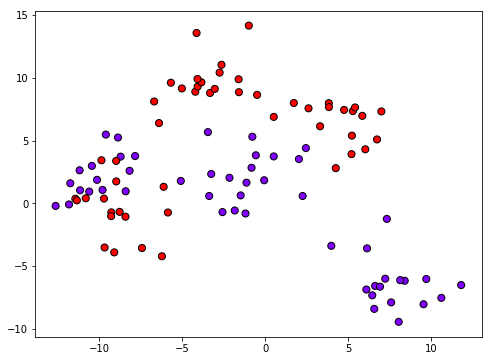

In [2]:
np.random.seed(7530)
X, y = make_blobs(n_samples=100, centers=6, n_features=2, cluster_std=2)
y = np.where(y%2 == 0, 0, np.where(y%2 == 1, 1, y))


plt.figure(figsize = [8,6])
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=50, edgecolor='k', cmap='rainbow')
plt.show()

In [3]:
np.random.seed(7530)
X, y = make_blobs(n_samples=100, centers=6, n_features=2, cluster_std=2)
y = np.where(y%2 == 0, 0, np.where(y%2 == 1, 1, y))

D = IntSlider(min=1, max=5, step=1, value=1, description = 'D', 
                    continuous_update=False, layout=Layout(width='275px'))
C = FloatSlider(min=0.01, max=5, step=0.01, value=0.05, description = 'C', 
                    continuous_update=False, layout=Layout(width='275px'))
G = FloatSlider(min=0.01, max=5, step=0.01, value=0.5, description = 'G', 
                    continuous_update=False, layout=Layout(width='275px'))

s1 = Checkbox(value=False, description='Show Margins', disable=False)
s2 = Checkbox(value=False, description='Show Support', disable=False)
s3 = Checkbox(value=False, description='RBF Kernel', disable=False)

def svm_plot(D, C, G, s1, s2, s3):

    mapping = 'poly'
    if(s3):
        mapping = 'rbf'
        
    mod = SVC(C=C, kernel=mapping, degree=D, gamma=G)
    mod.fit(X,y)
    mlu.plot_regions(mod, X, y, 200, display=False)
    
    if(s2):
        plt.scatter(mod.support_vectors_[:, 0], mod.support_vectors_[:, 1], s=300,  linewidth=1, 
                    edgecolors='k', zorder=4, facecolors='none')
    
    if(s1):
        xticks = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
        yticks = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 100)
        grid_pts = np.transpose([np.tile(xticks,100), np.repeat(yticks,100)])
        P = mod.decision_function(grid_pts).reshape(100,100)
        plt.contour(xticks, yticks, P, colors='k', levels=[-1,0,1], 
                    linestyles = ['--', '-', '--'], zorder = 4)
        
    plt.show()


cdict = {'D':D, 'C':C, 'G':G, 's1':s1, 's2':s2, 's3':s3}
plot_out = interactive_output(svm_plot, cdict)
ui = VBox([D, C, G, s1, s2, s3])
display(HBox([ui, plot_out]))

A Jupyter Widget

## Example 5

5283


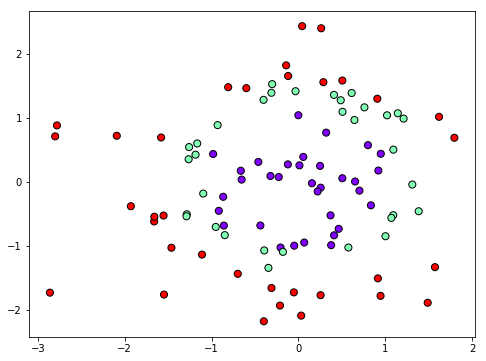

In [4]:
sd = np.random.choice(range(9999))
print(sd)
np.random.seed(sd)
X, y = make_gaussian_quantiles(n_features=2, n_classes=3)

plt.figure(figsize = [8,6])
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=50, edgecolor='k', cmap='rainbow')
plt.show()


In [5]:
np.random.seed(159)
X, y = make_gaussian_quantiles(n_features=2, n_classes=3)

D = IntSlider(min=1, max=10, step=1, value=1, description = 'D', 
                    continuous_update=False, layout=Layout(width='275px'))
C = FloatSlider(min=0.01, max=20, step=0.01, value=20, description = 'C', 
                    continuous_update=False, layout=Layout(width='275px'))
G = FloatSlider(min=0.01, max=100, step=0.01, value=0.5, description = 'G', 
                    continuous_update=False, layout=Layout(width='275px'))

s2 = Checkbox(value=False, description='Show Support', disable=False)
s3 = Checkbox(value=False, description='RBF Kernel', disable=False)

def svm_plot(D, C, G, s2, s3):

    mapping = 'poly'
    if(s3):
        mapping = 'rbf'
        
    mod = SVC(C=C, kernel=mapping, degree=D, gamma=G)
    mod.fit(X,y)
    mlu.plot_regions(mod, X, y, 300, display=False)
    
    if(s2):
        plt.scatter(mod.support_vectors_[:, 0], mod.support_vectors_[:, 1], s=300,  linewidth=1, 
                    edgecolors='k', zorder=4, facecolors='none')
    
    plt.show()


cdict = {'D':D, 'C':C, 'G':G, 's2':s2, 's3':s3}
plot_out = interactive_output(svm_plot, cdict)
ui = VBox([D, C, G, s2, s3])
display(HBox([ui, plot_out]))

A Jupyter Widget

## Example 6

6341


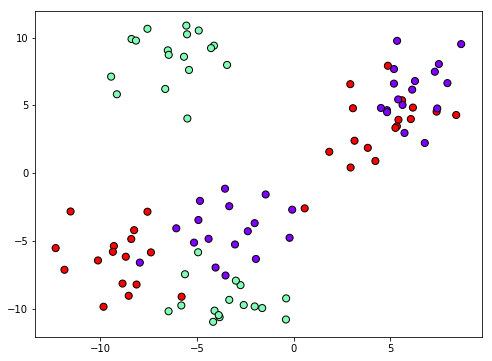

In [6]:
sd = np.random.choice(range(9999))
print(sd)
np.random.seed(sd)
X, y = make_blobs(n_samples=100, centers=6, n_features=2, cluster_std=2)
y = np.where(y%3 == 0, 0, np.where(y%3 == 1, 1, np.where(y%3 == 2, 2, y)))


plt.figure(figsize = [8,6])
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=50, edgecolor='k', cmap='rainbow')
plt.show()

In [7]:
np.random.seed(2064)
X, y = make_blobs(n_samples=100, centers=6, n_features=2, cluster_std=2)
y = np.where(y%3 == 0, 0, np.where(y%3 == 1, 1, np.where(y%3 == 2, 2, y)))

D = IntSlider(min=1, max=5, step=1, value=1, description = 'D', 
                    continuous_update=False, layout=Layout(width='275px'))
C = FloatSlider(min=0.01, max=5, step=0.01, value=0.05, description = 'C', 
                    continuous_update=False, layout=Layout(width='275px'))
G = FloatSlider(min=0.01, max=5, step=0.01, value=0.5, description = 'G', 
                    continuous_update=False, layout=Layout(width='275px'))

s2 = Checkbox(value=False, description='Show Support', disable=False)
s3 = Checkbox(value=False, description='RBF Kernel', disable=False)

def svm_plot(D, C, G, s2, s3):

    mapping = 'poly'
    if(s3):
        mapping = 'rbf'
        
    mod = SVC(C=C, kernel=mapping, degree=D, gamma=G)
    mod.fit(X,y)
    mlu.plot_regions(mod, X, y, 200, display=False)
    
    if(s2):
        plt.scatter(mod.support_vectors_[:, 0], mod.support_vectors_[:, 1], s=300,  linewidth=1, 
                    edgecolors='k', zorder=4, facecolors='none')
        
    plt.show()


cdict = {'D':D, 'C':C, 'G':G, 's2':s2, 's3':s3}
plot_out = interactive_output(svm_plot, cdict)
ui = VBox([D, C, G, s2, s3])
display(HBox([ui, plot_out]))

A Jupyter Widget